In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData
import os

In [2]:
def load_3dgs_data_with_attributes(path_3dgs):
    """
    Load 3DGS data with attributes from a PLY file.
    
    Args:
        path_3dgs (str): Path to the 3DGS PLY file
    
    Returns:
        points_3dgs (np.ndarray): 3DGS points [N, 3]
        colors_3dgs (np.ndarray): 3DGS colors [N, 3]
        features_3dgs (np.ndarray): 3DGS attributes [N, 8] (scale_x, scale_y, scale_z, opacity, rot_w, rot_x, rot_y, rot_z)
    """
    with open(path_3dgs, 'rb') as f:
        ply_data_3dgs = PlyData.read(f)
    vertex_data_3dgs = ply_data_3dgs['vertex']
    
    points_3dgs = np.stack([vertex_data_3dgs['x'], vertex_data_3dgs['y'], vertex_data_3dgs['z']], axis=-1)
    
    # SH 1차 계수 (f_dc_0, f_dc_1, f_dc_2) -> RGBimport numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")asdasdimport numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")fasfdfsdafasddfdfimport numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")fdfssdfasdfasdf5_modi-attr5_modi-attr5_modi-attr5_modi-attr5_modi-attrdsdsad5_modi-attradasdasdasdasda5_modi-attr5_modi-attrfasdasdasdasdasdaimport numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")asdasasdasdasdasdasdasdasdimport numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")asdasdasdasdasdasdasdimport numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")import numpy as np
import matplotlib.pyplot as plt

def load_pointcept_data(data_dir):
    """Pointcept 데이터를 로드 (가정된 함수)"""
    data = {}
    for key in ['coord', 'color', 'normal', 'segment20', 'segment200', 'instance']:
        file_path = f"{data_dir}/{key}.npy"
        data[key] = np.load(file_path)
    return data

def compute_label_distribution(labels, ignore_index=-1, max_label=20):
    """라벨 분포 계산"""
    distribution = {}
    valid_labels = labels[labels != ignore_index]
    for label in range(-1, max_label):
        count = np.sum(labels == label)
        distribution[label] = count / len(labels)
    return distribution

def compare_datasets(previous_dir, current_dir, scene_name="scene0010_00"):
    """
    이전 데이터셋과 현재 데이터셋 비교.
    
    Args:
        previous_dir (str): 이전 데이터셋 경로.
        current_dir (str): 현재 데이터셋 경로.
        scene_name (str): 장면 이름.
    """
    # 데이터 로드
    previous_data = load_pointcept_data(previous_dir)
    current_data = load_pointcept_data(current_dir)

    # 포인트 수 비교
    prev_points = len(previous_data['coord'])
    curr_points = len(current_data['coord'])
    print(f"\nPoint Count Comparison for {scene_name}:")
    print(f"  Previous: {prev_points}")
    print(f"  Current: {curr_points}")
    print(f"  Difference: {curr_points - prev_points}")

    # 라벨 분포 비교
    print("\nLabel Distribution Comparison:")
    for label_key in ['segment20', 'segment200', 'instance']:
        max_label = 20 if label_key == 'segment20' else 200 if label_key == 'segment200' else 1000
        prev_dist = compute_label_distribution(previous_data[label_key], max_label=max_label)
        curr_dist = compute_label_distribution(current_data[label_key], max_label=max_label)

        print(f"\n{label_key} Distribution:")
        print(f"  Previous -1 ratio: {prev_dist[-1]:.4f}")
        print(f"  Current -1 ratio: {curr_dist[-1]:.4f}")
        print(f"  Difference: {curr_dist[-1] - prev_dist[-1]:.4f}")

        # 히스토그램 시각화
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(list(prev_dist.keys()), list(prev_dist.values()))
        plt.title(f"Previous {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.subplot(1, 2, 2)
        plt.bar(list(curr_dist.keys()), list(curr_dist.values()))
        plt.title(f"Current {label_key} Distribution")
        plt.xlabel("Label")
        plt.ylabel("Ratio")
        plt.tight_layout()
        plt.show()

    # 색상 및 법선 통계 비교
    print("\nColor and Normal Statistics Comparison:")
    for key in ['color', 'normal']:
        prev_mean = np.mean(previous_data[key], axis=0)
        prev_std = np.std(previous_data[key], axis=0)
        curr_mean = np.mean(current_data[key], axis=0)
        curr_std = np.std(current_data[key], axis=0)
        print(f"\n{key}:")
        print(f"  Previous Mean: {prev_mean}")
        print(f"  Current Mean: {curr_mean}")
        print(f"  Mean Difference: {curr_mean - prev_mean}")
        print(f"  Previous Std: {prev_std}")
        print(f"  Current Std: {curr_std}")
        print(f"  Std Difference: {curr_std - prev_std}")

# 사용 예시
previous_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_keep-dup/train/scene0010_00"
current_dir = "/home/knuvi/Desktop/song/Pointcept/data/pdistance00005_scale05_modi-attr/train/scene0010_00"
compare_datasets(previous_dir, current_dir, "scene0010_00")
    colors_3dgs = np.stack([vertex_data_3dgs['f_dc_0'], vertex_data_3dgs['f_dc_1'], vertex_data_3dgs['f_dc_2']], axis=-1)
    # SH 계수는 일반적으로 [-1, 1] 범위로 저장됨 -> [0, 1]로 정규화
    colors_3dgs = (colors_3dgs + 1.0) / 2.0  # [-1, 1] -> [0, 1]
    colors_3dgs = np.clip(colors_3dgs, 0.0, 1.0)  # 범위 제한

    scales_3dgs = np.stack([vertex_data_3dgs['scale_0'], vertex_data_3dgs['scale_1'], vertex_data_3dgs['scale_2']], axis=-1)
    opacity_3dgs = vertex_data_3dgs['opacity']
    rotation_3dgs = np.stack([vertex_data_3dgs['rot_0'], vertex_data_3dgs['rot_1'], vertex_data_3dgs['rot_2'], vertex_data_3dgs['rot_3']], axis=-1)  # Quaternion (w, x, y, z)
    
    features_3dgs = np.hstack((scales_3dgs, opacity_3dgs[:, np.newaxis], rotation_3dgs))
    return points_3dgs, colors_3dgs, features_3dgs

In [3]:
# %% [code]
# 데이터 경로 설정
ply_path = "/home/knuvi/Desktop/song/data/3dgs_scans/3dgs_output/scene0011_00/point_cloud.ply"  # PLY 파일 경로 (사용자가 수정 필요)

# 데이터 로드
if not os.path.exists(ply_path):
    raise FileNotFoundError(f"{ply_path} 파일이 존재하지 않습니다. 경로를 확인해주세요.")
points, colors, features = load_3dgs_data_with_attributes(ply_path)

# 데이터 차원 확인
print("Points shape:", points.shape)
print("Colors shape:", colors.shape)
print("Features shape:", features.shape)

# 속성 분리
scale = features[:, 0:3]  # [N, 3]
opacity = features[:, 3:4]  # [N, 1]
rotation = features[:, 4:8]  # [N, 4] (쿼터니언: rot_w, rot_x, rot_y, rot_z)

print("Scale shape:", scale.shape)
print("Opacity shape:", opacity.shape)
print("Rotation shape:", rotation.shape)

Points shape: (314733, 3)
Colors shape: (314733, 3)
Features shape: (314733, 8)
Scale shape: (314733, 3)
Opacity shape: (314733, 1)
Rotation shape: (314733, 4)



Scale 통계:
최소값: -16.7282
최대값: 0.2799
평균: -4.2062
표준편차: 1.0132
NaN 값 개수: 0
Inf 값 개수: 0


/home/knuvi/miniconda3/envs/pt/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/knuvi/miniconda3/envs/pt/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/knuvi/miniconda3/envs/pt/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/knuvi/miniconda3/envs/pt/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/knuvi/miniconda3/envs/pt/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from cu

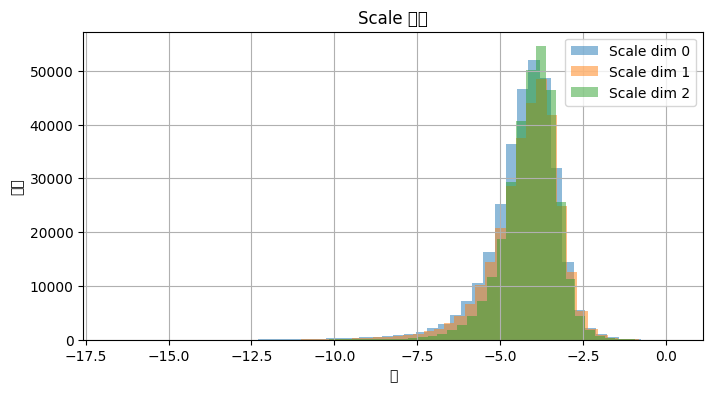


Opacity 통계:
최소값: -6.8292
최대값: 10.8740
평균: -1.6189
표준편차: 1.9291
NaN 값 개수: 0
Inf 값 개수: 0


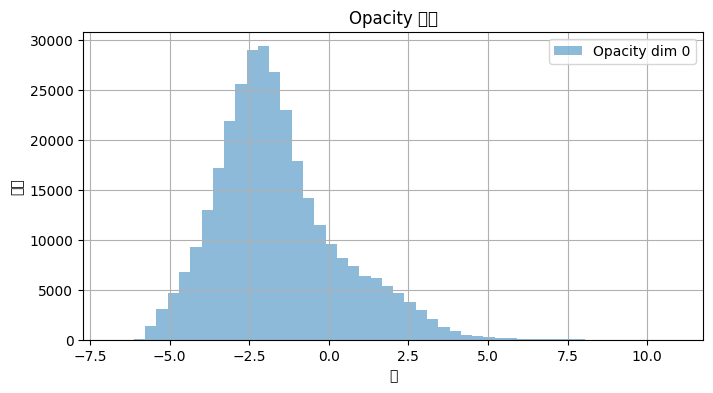


Rotation (Quaternion) 통계:
최소값: -0.9625
최대값: 2.2201
평균: 0.2354
표준편차: 0.4430
NaN 값 개수: 0
Inf 값 개수: 0


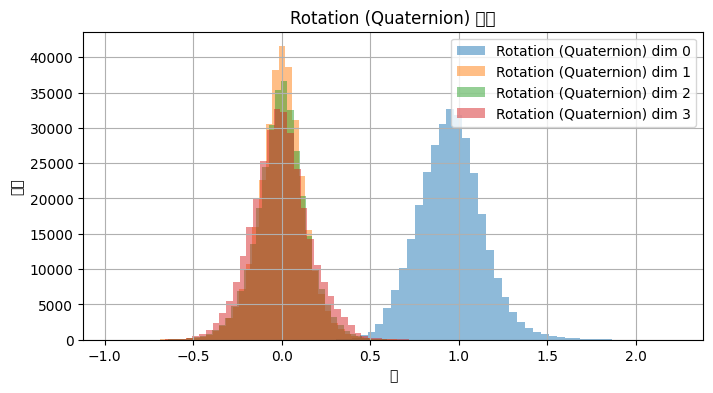

In [4]:
# %% [code]
# 통계 정보 출력 함수
def print_stats(data, name):
    print(f"\n{name} 통계:")
    print(f"최소값: {np.min(data):.4f}")
    print(f"최대값: {np.max(data):.4f}")
    print(f"평균: {np.mean(data):.4f}")
    print(f"표준편차: {np.std(data):.4f}")
    print(f"NaN 값 개수: {np.isnan(data).sum()}")
    print(f"Inf 값 개수: {np.isinf(data).sum()}")

# 히스토그램 시각화 함수
def plot_histogram(data, name, bins=50):
    plt.figure(figsize=(8, 4))
    if data.ndim == 2:
        # 다차원 데이터의 경우 각 차원별로 히스토그램을 그림
        for i in range(data.shape[1]):
            plt.hist(data[:, i], bins=bins, alpha=0.5, label=f"{name} dim {i}")
    else:
        plt.hist(data, bins=bins, alpha=0.5, label=name)
    plt.title(f"{name} 분포")
    plt.xlabel("값")
    plt.ylabel("빈도")
    plt.legend()
    plt.grid(True)
    plt.show()

# Scale 분석
print_stats(scale, "Scale")
plot_histogram(scale, "Scale")

# Opacity 분석
print_stats(opacity, "Opacity")
plot_histogram(opacity, "Opacity")

# Rotation 분석 (쿼터니언)
print_stats(rotation, "Rotation (Quaternion)")
plot_histogram(rotation, "Rotation (Quaternion)")